![tower_bridge](tower_bridge.jpg)

As the climate changes, predicting the weather becomes ever more important for businesses. You have been asked to support on a machine learning project with the aim of building a pipeline to predict the climate in London, England. Specifically, the model should predict mean temperature in degrees Celsius (°C).

Since the weather depends on a lot of different factors, you will want to run a lot of experiments to determine what the best approach is to predict the weather. In this project, you will run experiments for different regression models predicting the mean temperature, using a combination of `sklearn` and `mlflow`.

You will be working with data stored in `london_weather.csv`, which contains the following columns:
- **date** - recorded date of measurement - (**int**)
- **cloud_cover** - cloud cover measurement in oktas - (**float**)
- **sunshine** - sunshine measurement in hours (hrs) - (**float**)
- **global_radiation** - irradiance measurement in Watt per square meter (W/m2) - (**float**)
- **max_temp** - maximum temperature recorded in degrees Celsius (°C) - (**float**)
- **mean_temp** - **target** mean temperature in degrees Celsius (°C) - (**float**)
- **min_temp** - minimum temperature recorded in degrees Celsius (°C) - (**float**)
- **precipitation** - precipitation measurement in millimeters (mm) - (**float**)
- **pressure** - pressure measurement in Pascals (Pa) - (**float**)
- **snow_depth** - snow depth measurement in centimeters (cm) - (**float**)

In [29]:
# Run this cell to install mlflow
!pip install mlflow

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [30]:
# Run this cell to import the modules you require
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Read in the data
weather = pd.read_csv("london_weather.csv")

# Start coding here
# Use as many cells as you like

In [31]:
print(weather.head())
print(weather.info())
print(weather.describe())

       date  cloud_cover  sunshine  ...  precipitation  pressure  snow_depth
0  19790101          2.0       7.0  ...            0.4  101900.0         9.0
1  19790102          6.0       1.7  ...            0.0  102530.0         8.0
2  19790103          5.0       0.0  ...            0.0  102050.0         4.0
3  19790104          8.0       0.0  ...            0.0  100840.0         2.0
4  19790105          6.0       2.0  ...            0.0  102250.0         1.0

[5 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 n

In [32]:
weather.date = pd.to_datetime(weather['date'], format = '%Y%m%d')
weather

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [33]:
weather['year'] = weather['date'].dt.year
weather['month'] = weather['date'].dt.month
weather

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,year,month
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979,1
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979,1
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979,1
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979,1
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN,2020,12
15337,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN,2020,12
15338,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN,2020,12
15339,2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN,2020,12


In [34]:
print(weather.shape)
print(weather.isna().sum())

(15341, 12)
date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
year                   0
month                  0
dtype: int64


EDA

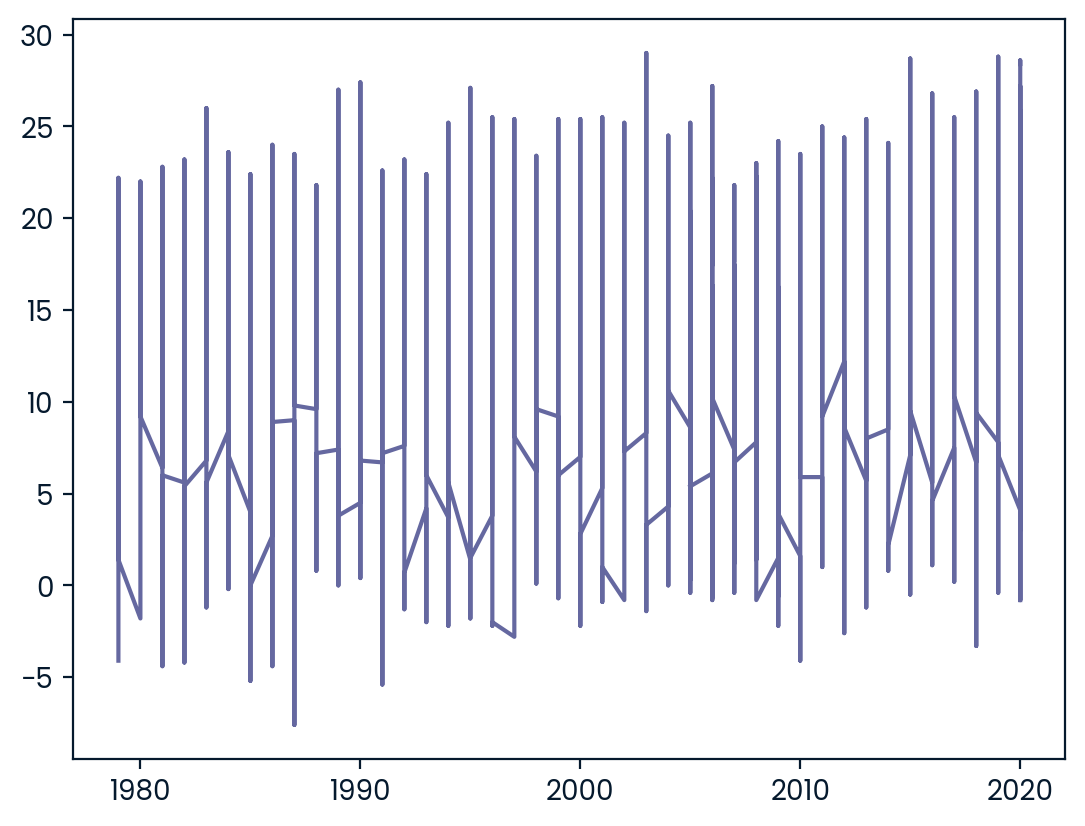

In [35]:
mean_temp_plot_year = plt.plot(weather['year'], weather['mean_temp'])

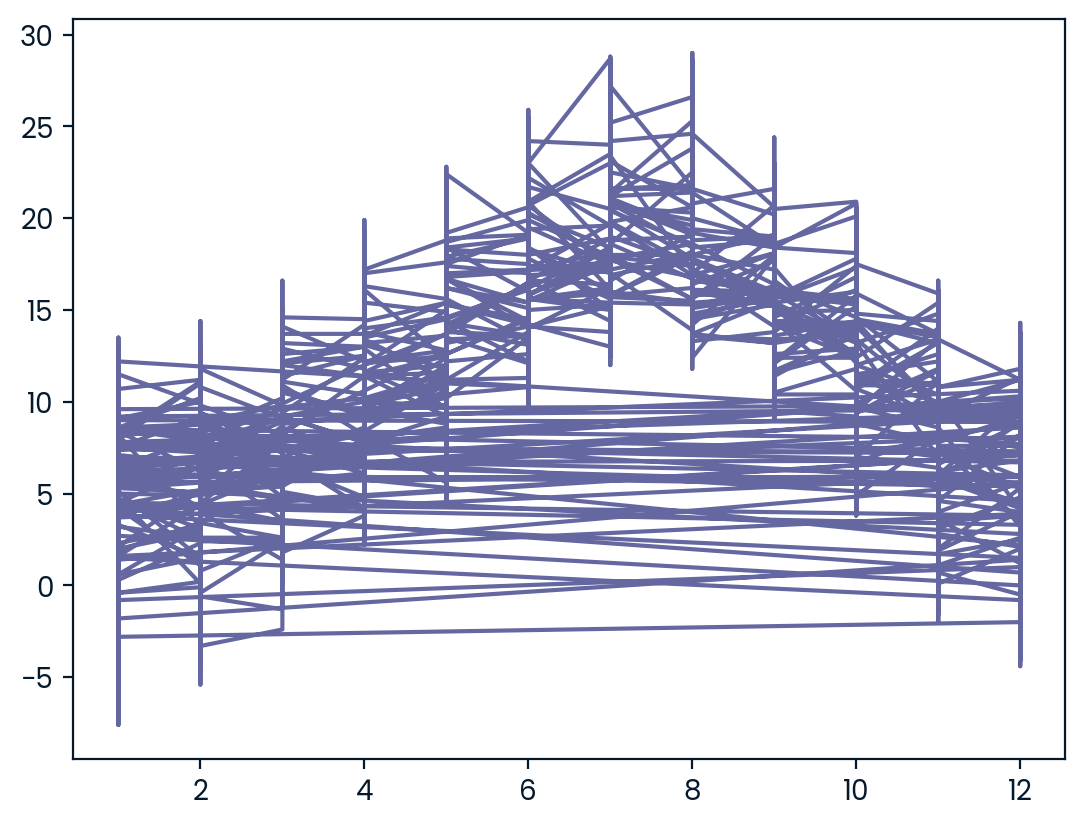

In [36]:
mean_temp_plot_month = plt.plot(weather['month'], weather['mean_temp'])

The maximum and minimum average temp are 29°C (July, 2003) and -7.6°C (January, 1987) respectively. 

Obtaining the highest and lowest values of the rest features.

In [37]:
def highest_lowest (df, column):
    return df[column].max(), df[column].min() 

In [38]:
highest_lowest(weather, 'global_radiation')

(402.0, 8.0)

In [39]:
weather.columns

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth',
       'year', 'month'],
      dtype='object')

In [40]:
for feature in weather.columns:
    print(feature,':', highest_lowest(weather, feature))

date : (Timestamp('2020-12-31 00:00:00'), Timestamp('1979-01-01 00:00:00'))
cloud_cover : (9.0, 0.0)
sunshine : (16.0, 0.0)
global_radiation : (402.0, 8.0)
max_temp : (37.9, -6.2)
mean_temp : (29.0, -7.6)
min_temp : (22.3, -11.8)
precipitation : (61.8, 0.0)
pressure : (104820.0, 95960.0)
snow_depth : (22.0, 0.0)
year : (2020, 1979)
month : (12, 1)


In [41]:
corr = weather.corr()
corr

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,year,month
cloud_cover,1.000000,-0.738291,-0.485973,-0.212224,-0.110556,0.048838,0.235269,-0.241955,-0.001256,-0.107003,-0.020270
sunshine,-0.738291,1.000000,0.852632,0.472182,0.396535,0.219082,-0.231636,0.226943,-0.034222,0.009163,-0.033842
global_radiation,-0.485973,0.852632,1.000000,0.690946,0.635432,0.478119,-0.162668,0.150078,-0.061781,0.008395,-0.092202
max_temp,-0.212224,0.472182,0.690946,1.000000,0.912200,0.810514,-0.071799,0.100455,-0.130594,0.086319,0.183841
mean_temp,-0.110556,0.396535,0.635432,0.912200,1.000000,0.955593,-0.010462,0.004764,-0.154945,0.093743,0.227076
min_temp,0.048838,0.219082,0.478119,0.810514,0.955593,1.000000,0.037233,-0.074274,-0.157882,0.094605,0.251754
precipitation,0.235269,-0.231636,-0.162668,-0.071799,-0.010462,0.037233,1.000000,-0.349456,-0.001352,0.008024,0.034347
pressure,-0.241955,0.226943,0.150078,0.100455,0.004764,-0.074274,-0.349456,1.000000,-0.021229,-0.013311,-0.039774
snow_depth,-0.001256,-0.034222,-0.061781,-0.130594,-0.154945,-0.157882,-0.001352,-0.021229,1.000000,-0.043567,-0.056709
year,-0.107003,0.009163,0.008395,0.086319,0.093743,0.094605,0.008024,-0.013311,-0.043567,1.000000,-0.000039


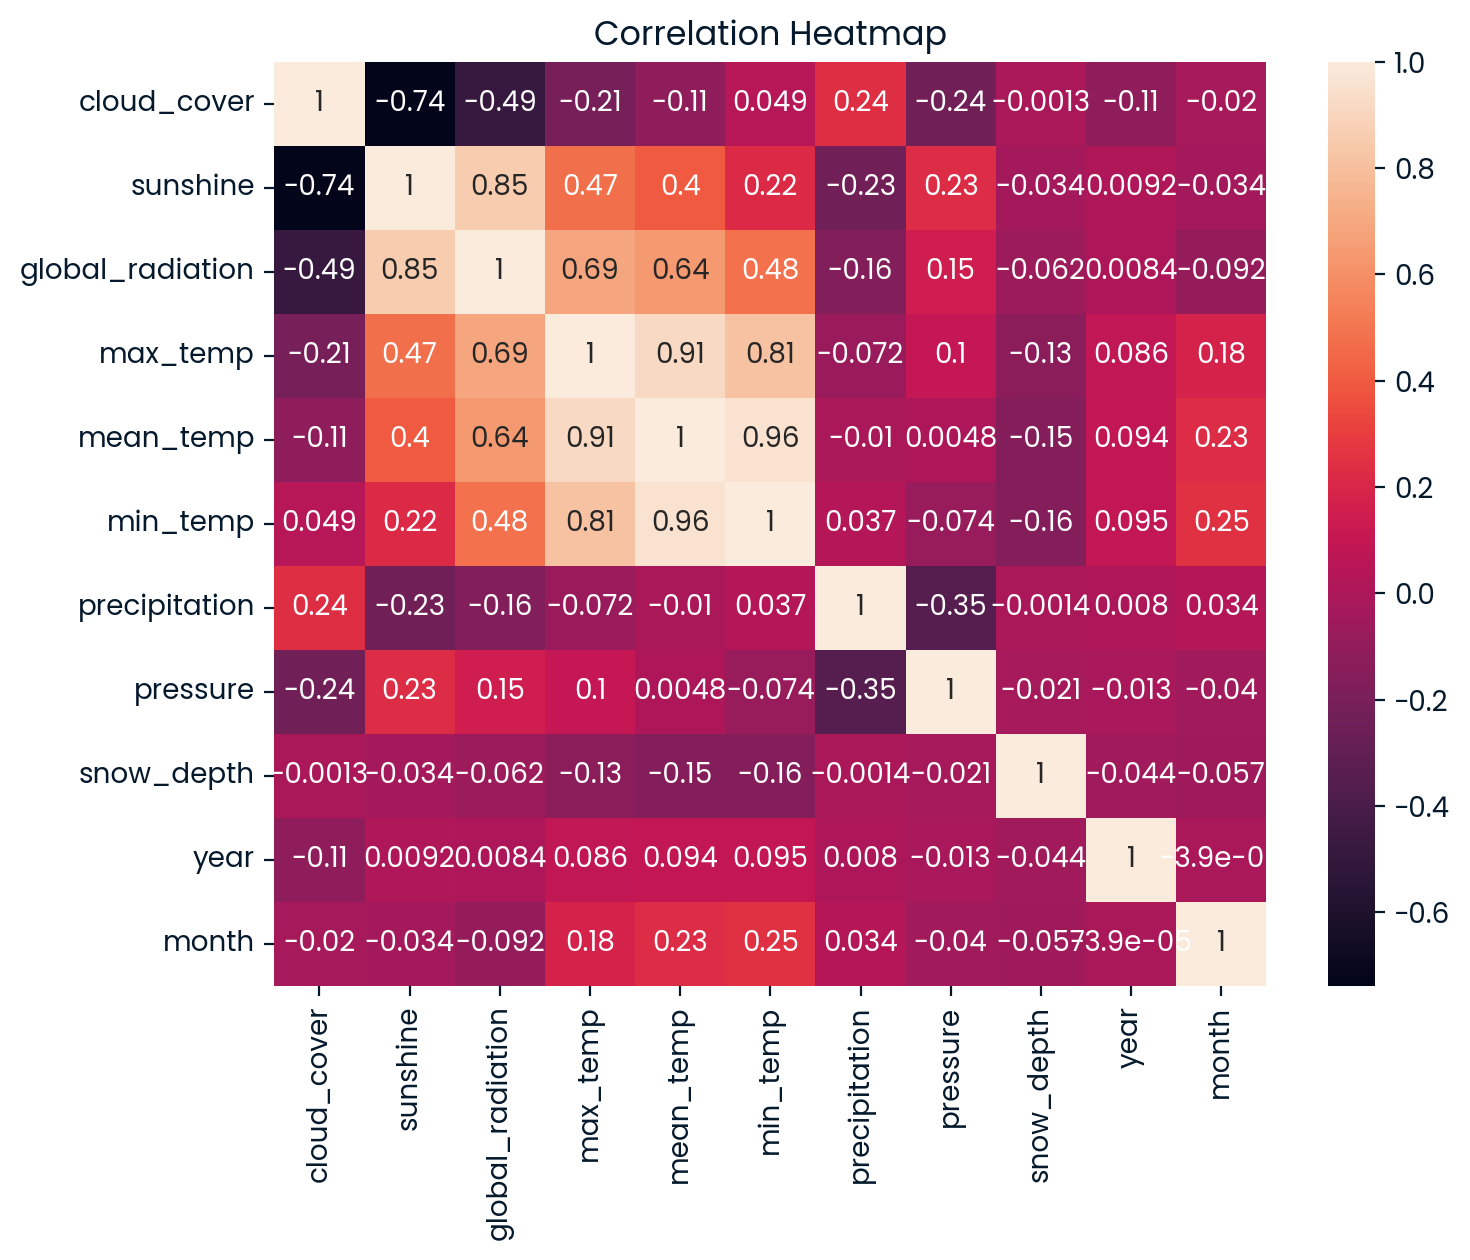

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot = True, )
plt.title('Correlation Heatmap')
plt.show()


Feature Selection: From the heatmap above. Weather factors such as sunshine, global radiation, maximum and minimum temperature, time of the year as well as cloud cover are all associated with the average temperature of a specific month.

In [43]:
feature_selection = ['sunshine', 'global_radiation', 'max_temp', 'min_temp', 'month', 'cloud_cover']

Data preprocessing

In [44]:
X = weather[feature_selection]
y = weather['mean_temp'].dropna()

Calling the mlflow autolog to log from the preprocessing exercise

In [45]:
#mlflow.autolog()

filling the missing fields

In [46]:
imputer = SimpleImputer(strategy= 'mean')

In [47]:
X_imputed = imputer.fit_transform(X)
X_imputed

array([[ 7. , 52. ,  2.3, -7.5,  1. ,  2. ],
       [ 1.7, 27. ,  1.6, -7.5,  1. ,  6. ],
       [ 0. , 13. ,  1.3, -7.2,  1. ,  5. ],
       ...,
       [ 0. , 21. ,  4.1,  1.1, 12. ,  7. ],
       [ 0.4, 22. ,  5.6, -0.1, 12. ,  6. ],
       [ 1.3, 34. ,  1.5, -3.1, 12. ,  7. ]])

In [48]:
X_imputed_df = pd.DataFrame(X_imputed, columns= X.columns)
X_imputed_df

,sunshine,global_radiation,max_temp,min_temp,month,cloud_cover
0,7.0,52.0,2.3,-7.5,1.0,2.0
1,1.7,27.0,1.6,-7.5,1.0,6.0
2,0.0,13.0,1.3,-7.2,1.0,5.0
3,0.0,13.0,-0.3,-6.5,1.0,8.0
4,2.0,29.0,5.6,-1.4,1.0,6.0
...,...,...,...,...,...,...
15336,0.9,32.0,7.5,7.6,12.0,1.0
15337,3.7,38.0,3.6,-1.3,12.0,7.0
15338,0.0,21.0,4.1,1.1,12.0,7.0
15339,0.4,22.0,5.6,-0.1,12.0,6.0


In [49]:
print(X_imputed_df.shape, y.shape)

(15341, 6) (15305,)


Splitting the data for Model development

In [50]:
# Ensure that X_imputed_df and y have the same number of samples
X_imputed_df = X_imputed_df.iloc[:15305]  # Truncate X_imputed_df to match y's length

X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, y, train_size=0.75, random_state=123)

Scaling the features of the data

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model development

In [52]:
for index, depth in enumerate([1,2,10]):
    run_name = f"run_{index}"
    with mlflow.start_run(run_name = run_name):
        lr = LinearRegression().fit(X_train_scaled, y_train)
        d_tree = DecisionTreeRegressor(random_state=123, max_depth= depth).fit(X_train_scaled, y_train)
        r_forest = RandomForestRegressor(random_state= 123, max_depth= depth).fit(X_train_scaled, y_train)
        mlflow.sklearn.log_model(lr, 'linear regression')
        mlflow.sklearn.log_model(d_tree, 'decision tree')
        mlflow.sklearn.log_model(r_forest, 'random forest')
        #for linear regression
        lr_pred = lr.predict(X_test_scaled)
        lr_rmse = mean_squared_error(y_test, lr_pred, squared= False)

        #for decision tree
        d_tree_pred = d_tree.predict(X_test_scaled)
        d_tree_rmse = mean_squared_error(y_test, d_tree_pred, squared= False)

        #for random forest
        r_forest_pred = r_forest.predict(X_test_scaled)
        r_forest_rmse = mean_squared_error(y_test, r_forest_pred, squared= False)
        
        mlflow.log_param('max_depth', depth)
        mlflow.log_metric('lr_rmse', lr_rmse)
        mlflow.log_metric('d_tree_rmse', d_tree_rmse)
        mlflow.log_metric('r_forest_rmse', r_forest_rmse)

In [53]:
'''mlflow.sklearn.log_model(lr, 'linear regression')
mlflow.sklearn.log_model(d_tree, 'decision tree')
mlflow.sklearn.log_model(r_forest, 'random forest')'''

"mlflow.sklearn.log_model(lr, 'linear regression')\nmlflow.sklearn.log_model(d_tree, 'decision tree')\nmlflow.sklearn.log_model(r_forest, 'random forest')"

In [54]:
'''#for linear regression
lr_pred = lr.predict(X_test_scaled)
lr_rmse = mean_squared_error(y_test, lr_pred, squared= False)

#for decision tree
d_tree_pred = d_tree.predict(X_test_scaled)
d_tree_rmse = mean_squared_error(y_test, d_tree_pred, squared= False)

#for random forest
r_forest_pred = r_forest.predict(X_test_scaled)
r_forest_rmse = mean_squared_error(y_test, r_forest_pred, squared= False)'''

'#for linear regression\nlr_pred = lr.predict(X_test_scaled)\nlr_rmse = mean_squared_error(y_test, lr_pred, squared= False)\n\n#for decision tree\nd_tree_pred = d_tree.predict(X_test_scaled)\nd_tree_rmse = mean_squared_error(y_test, d_tree_pred, squared= False)\n\n#for random forest\nr_forest_pred = r_forest.predict(X_test_scaled)\nr_forest_rmse = mean_squared_error(y_test, r_forest_pred, squared= False)'

Logging the model's parameter(max_depth), and the 3 metrics for each model.

In [55]:
'''mlflow.log_param('max_depth', depth)
mlflow.log_metric('lr_rmse', lr_rmse)
mlflow.log_metric('d_tree_rmse', d_tree_rmse)
mlflow.log_metric('r_forest_rmse', r_forest_rmse)'''

"mlflow.log_param('max_depth', depth)\nmlflow.log_metric('lr_rmse', lr_rmse)\nmlflow.log_metric('d_tree_rmse', d_tree_rmse)\nmlflow.log_metric('r_forest_rmse', r_forest_rmse)"

In [56]:
experiment_results = mlflow.search_runs()
experiment_results

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.lr_rmse,metrics.r_forest_rmse,metrics.d_tree_rmse,metrics.training_score,metrics.training_root_mean_squared_error,metrics.training_r2_score,metrics.training_mean_squared_error,metrics.training_mean_absolute_error,params.max_depth,params.max_features,params.ccp_alpha,params.n_jobs,params.fit_intercept,params.bootstrap,params.min_impurity_decrease,params.min_weight_fraction_leaf,params.min_samples_split,params.random_state,params.criterion,params.copy_X,params.max_leaf_nodes,params.min_samples_leaf,params.positive,params.splitter,tags.mlflow.source.type,tags.mlflow.user,tags.mlflow.runName,tags.mlflow.source.name,tags.mlflow.log-model.history,tags.estimator_class,tags.estimator_name
0,9f059fb88c524a419633da8b7ad65345,0,FINISHED,file:///work/files/workspace/mlruns/0/9f059fb8...,2025-01-02 23:33:58.462000+00:00,2025-01-02 23:34:08.732000+00:00,2.567326,2.524504,2.839422,NaN,NaN,NaN,NaN,NaN,10,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,LOCAL,repl,run_2,/usr/lib/python3/dist-packages/python_kernel/k...,"[{""run_id"": ""9f059fb88c524a419633da8b7ad65345""...",None,None
1,9c753406b36f4498bcdcb332a0f0b1c7,0,FINISHED,file:///work/files/workspace/mlruns/0/9c753406...,2025-01-02 23:33:49.658000+00:00,2025-01-02 23:33:58.387000+00:00,2.567326,3.175969,3.264341,NaN,NaN,NaN,NaN,NaN,2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,LOCAL,repl,run_1,/usr/lib/python3/dist-packages/python_kernel/k...,"[{""run_id"": ""9c753406b36f4498bcdcb332a0f0b1c7""...",None,None
2,5e804b6dfbe4428d93460da1716880d8,0,FINISHED,file:///work/files/workspace/mlruns/0/5e804b6d...,2025-01-02 23:33:41.068000+00:00,2025-01-02 23:33:49.576000+00:00,2.567326,3.802436,3.842099,NaN,NaN,NaN,NaN,NaN,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,LOCAL,repl,run_0,/usr/lib/python3/dist-packages/python_kernel/k...,"[{""run_id"": ""5e804b6dfbe4428d93460da1716880d8""...",None,None
3,33c04bac9a2e4877ac2cd98a6f0b184d,0,FINISHED,file:///work/files/workspace/mlruns/0/33c04bac...,2025-01-02 23:32:11.867000+00:00,2025-01-02 23:32:22.217000+00:00,2.567326,2.524504,2.839422,NaN,NaN,NaN,NaN,NaN,10,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,LOCAL,repl,run_2,/usr/lib/python3/dist-packages/python_kernel/k...,"[{""run_id"": ""33c04bac9a2e4877ac2cd98a6f0b184d""...",None,None
4,82d322804f2748e7ae5b48f59e059bfa,0,FINISHED,file:///work/files/workspace/mlruns/0/82d32280...,2025-01-02 23:32:03.058000+00:00,2025-01-02 23:32:11.791000+00:00,2.567326,3.175969,3.264341,NaN,NaN,NaN,NaN,NaN,2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,LOCAL,repl,run_1,/usr/lib/python3/dist-packages/python_kernel/k...,"[{""run_id"": ""82d322804f2748e7ae5b48f59e059bfa""...",None,None
5,17f7d429eb74484cbafc204c9d604f26,0,FINISHED,file:///work/files/workspace/mlruns/0/17f7d429...,2025-01-02 23:31:53.795000+00:00,2025-01-02 23:32:02.986000+00:00,2.567326,3.802436,3.842099,NaN,NaN,NaN,NaN,NaN,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,LOCAL,repl,run_0,/usr/lib/python3/dist-packages/python_kernel/k...,"[{""run_id"": ""17f7d429eb74484cbafc204c9d604f26""...",None,None
6,d70d9854b8d345cbbcdad91c051518b5,0,FINISHED,file:///work/files/workspace/mlruns/0/d70d9854...,2025-01-02 23:26:40.386000+00:00,2025-01-02 23:31:36.472000+00:00,2.567326,2.524504,2.839422,NaN,NaN,NaN,NaN,NaN,10,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,LOCAL,repl,judicious-deer-258,/usr/lib/python3/dist-packages/python_kernel/k...,"[{""run_id"": ""d70d9854b8d345cbbcdad91c051518b5""...",None,None
7,d2cff00c9f8c447bb7251dbab907f66a,0,FINISHED,file:///work/files/workspace/mlruns/0/d2cff00c...,2025-01-02 23:26:37.917000+00:00,2025-01-02 23:26:40.302000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,LOCAL,repl,run_2,